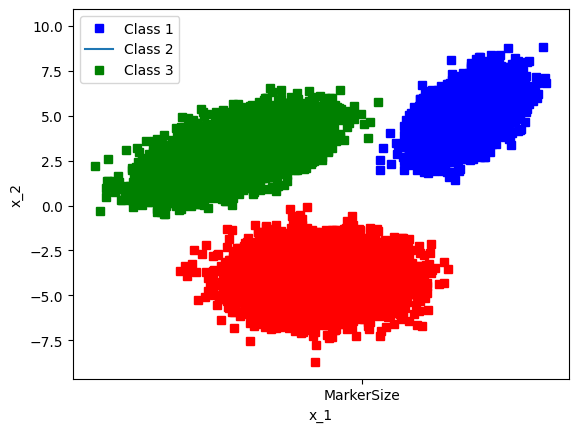

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'gs','MarkerSize',10)
plt.plot(X_2[:,0],X_2[:,1],'rs','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show

# Calssification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

# data set containing two classes
data_set = np.array([[X_1,C_1],[X_2,C_2]]); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.
#data_set.length

#YOUR CODE BELOW
# First number decides between 0 for x_1 and 1 for x_2
# Second number changes between 0 for for X and 1 for C of dataset
# Third number is amount the entire dataset of 10000, should always be : for whole dataset
# Last number should also always be :, as that changes it from a 2x10000 to a 1x10000 dataset
# Examples:
# print(data_set[0,0,:,:])  prints all of X_1
# print(data_set[1,1,:,:])  prints all of C_2
# print(data_set[0,:,0:5,:]) prints the first 5 X_1 with the corresponding first C_1

In [96]:
# My code!

# Split into test and training data
L = 200
M=10
sigma_noise = 0.3
X = 0+(0+1)*np.random.randn(L,1)
Y = np.sin(2*np.pi*X)+sigma_noise*np.random.randn(L,1)
D=np.array([X,Y])
def error_model(Y_true, Y_est, N):
    return np.sqrt(np.mean(np.abs(Y_true-Y_est))**2/N)

L_test = 100 # size of test dataset
Q = L/L_test
for q in range(0,Q-1):
    X_test = X[(q-1)*L_test+1:Q*L_test]
    Y_test = Y[(q-1)*L_test+1:Q*L_test]
    X_train = X
    Y_train = Y
    X_train[(q-1)*L_test+1 : q*L_test] = []
    Y_train[(q-1)*L_test+1 : q*L_test] = []

for i in range(0,M):
    for j in range(0,i ):
        
